In [2]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import tensorflow.keras.layers as tfl
import pandas as pd

In [13]:

(X_train, y_train) , (X_test, y_test) = keras.datasets.mnist.load_data()

In [3]:
len(X_train)

60000

In [4]:
len(y_train)

60000

In [15]:
X_train.shape

(60000, 28, 28)

labels is 5


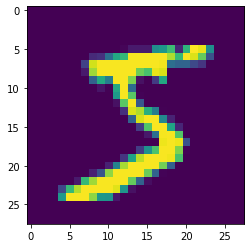

In [6]:
plt.imshow(X_train[0])
print("labels is" , y_train[0])

In [22]:
X_train=X_train.reshape((60000,28,28,1))

In [44]:
X_test=X_test.reshape((10000,28,28,1))

In [23]:
X_train.shape

(60000, 28, 28, 1)

In [9]:
X_train_flatten=X_train.reshape(X_train.shape[0], X_train.shape[1]* X_train.shape[2])
X_test_flatten=X_test.reshape(X_test.shape[0], X_test.shape[1]* X_test.shape[2])

In [10]:
X_train_flatten.shape

(60000, 784)

In [11]:
model = keras.Sequential([
    keras.layers.Dense(100, input_dim=784,activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
    
])
model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

model.fit(X_train_flatten, y_train , epochs=5)

Epoch 1/5
1875/1875 [==============================] - 3s 1ms/step - loss: 7.6614 - accuracy: 0.7738
Epoch 2/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.4068 - accuracy: 0.8951
Epoch 3/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2976 - accuracy: 0.9240
Epoch 4/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2467 - accuracy: 0.9345
Epoch 5/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2345 - accuracy: 0.9393


In [12]:
model.evaluate(X_test_flatten,y_test)

313/313 [==============================] - 0s 911us/step - loss: 0.2727 - accuracy: 0.9389


[0.27267155051231384, 0.9388999938964844]

# Trying to normalize vlaues and train model again 

In [13]:
X_train_flatten=X_train_flatten/255
X_test_flatten=X_test_flatten/255

In [17]:
model = keras.Sequential([
    keras.layers.Dense(100, input_dim=784,activation='relu'),
    keras.layers.Dense(10, activation='softmax')
    
])
model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

model.fit(X_train_flatten, y_train , epochs=5)

Epoch 1/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.4628 - accuracy: 0.8691
Epoch 2/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.1349 - accuracy: 0.9606
Epoch 3/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0891 - accuracy: 0.9731
Epoch 4/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0643 - accuracy: 0.9812
Epoch 5/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0481 - accuracy: 0.9850


In [18]:
model.evaluate(X_test_flatten,y_test)


313/313 [==============================] - 0s 937us/step - loss: 0.0788 - accuracy: 0.9755


[0.07876063883304596, 0.9754999876022339]

In [16]:
import seaborn as sn

Text(69.0, 0.5, 'Truth')

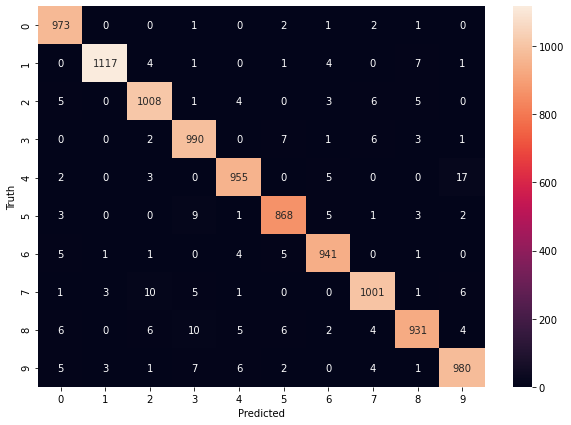

In [58]:
y_predicted = model.predict(X_test_flatten)
y_predicted_labels = [np.argmax(i) for i in y_predicted]
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_labels)

plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

# Trying Le-Net and comparing accuracy 

In [51]:
model =tf.keras.Sequential([
    #layer 1
    tfl.Conv2D(6,(5,5),strides=1,input_shape=(28,28,1)),
    tfl.MaxPool2D(pool_size=(2,2) , strides=2),
    #layer 2
    tfl.Conv2D(16,(5,5),strides=1),
    tfl.MaxPool2D(pool_size=(2,2) , strides=2),
    #layer 3
    tfl.Flatten(),
    tfl.Dense(120, activation="relu"),
    tfl.Dense(84,activation="relu"),
    tfl.Dense(10 , activation="softmax")
])

In [52]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [53]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_18 (Conv2D)           (None, 24, 24, 6)         156       
_________________________________________________________________
max_pooling2d_18 (MaxPooling (None, 12, 12, 6)         0         
_________________________________________________________________
conv2d_19 (Conv2D)           (None, 8, 8, 16)          2416      
_________________________________________________________________
max_pooling2d_19 (MaxPooling (None, 4, 4, 16)          0         
_________________________________________________________________
flatten_9 (Flatten)          (None, 256)               0         
_________________________________________________________________
dense_23 (Dense)             (None, 120)               30840     
_________________________________________________________________
dense_24 (Dense)             (None, 84)               

In [54]:
history=model.fit(X_train, y_train, epochs=10 )

Epoch 1/10
1875/1875 [==============================] - 11s 5ms/step - loss: 2.0224 - accuracy: 0.8078
Epoch 2/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.1470 - accuracy: 0.9557
Epoch 3/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.1017 - accuracy: 0.9695
Epoch 4/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0840 - accuracy: 0.9746
Epoch 5/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0745 - accuracy: 0.9783
Epoch 6/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0642 - accuracy: 0.9812
Epoch 7/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0594 - accuracy: 0.9826
Epoch 8/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0504 - accuracy: 0.9859
Epoch 9/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0498 - accuracy: 0.9859
Epoch 10/10
1875/1875 [==============================] - 11s 6ms/step - l

In [55]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.0685 - accuracy: 0.9837


[0.06848540902137756, 0.9836999773979187]

In [56]:
history.history

{'loss': [0.6386100053787231,
  0.13944289088249207,
  0.10593251138925552,
  0.08635328710079193,
  0.07624810189008713,
  0.06912713497877121,
  0.06250794976949692,
  0.057874806225299835,
  0.05425862595438957,
  0.05178386718034744],
 'accuracy': [0.8924499750137329,
  0.9592833518981934,
  0.9692666530609131,
  0.9748499989509583,
  0.9781666398048401,
  0.9799166917800903,
  0.9822166562080383,
  0.984083354473114,
  0.9846833348274231,
  0.9860833287239075]}

In [57]:
df_loss_acc = pd.DataFrame(history.history)

In [60]:
df_loss_acc.head()
df_loss=df_loss_acc['loss']
df_acc= df_loss_acc['accuracy']

[Text(0.5, 0, 'Epoch'), Text(0, 0.5, 'Loss')]

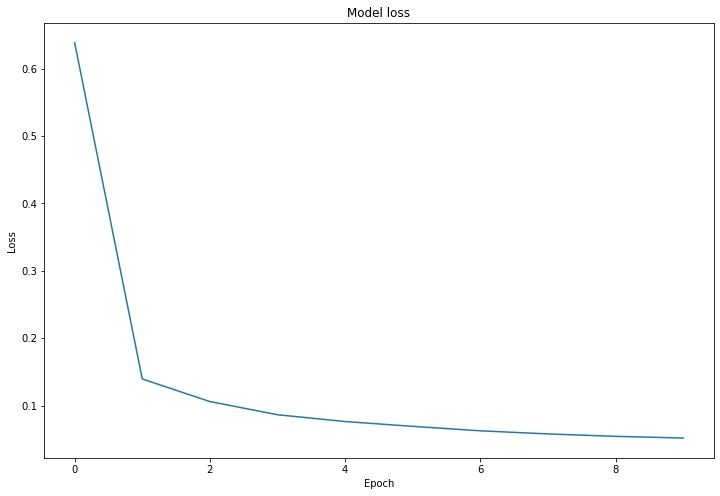

In [59]:
df_loss.plot(title='Model loss',figsize=(12,8)).set(xlabel='Epoch',ylabel='Loss')

[Text(0.5, 0, 'Epoch'), Text(0, 0.5, 'Accuracy')]

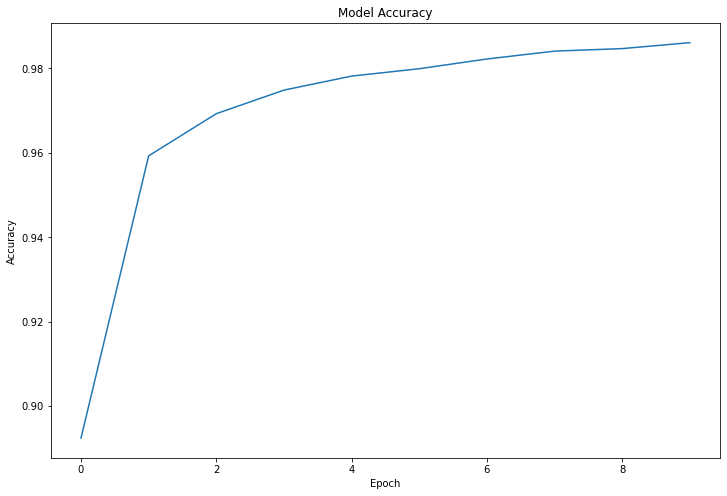

In [61]:
df_acc.plot(title='Model Accuracy',figsize=(12,8)).set(xlabel='Epoch',ylabel='Accuracy')